In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from  sklearn.preprocessing import  MinMaxScaler,OneHotEncoder
from sklearn.metrics import silhouette_score  # 导入轮廓系数指标
from sklearn.cluster import KMeans  # KMeans模块

%matplotlib inline
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取测试数据
df = pd.read_csv('../code_10_15/929result/5G移动_+anaz+9015-27-46hotmap_3006300.csv')

In [3]:
df.head()

,lng,lat,weight,file_path
0,103.957165,30.731096,8.797847e-07,"../929\output-BIZ2-2020-09-28_15-27-46.csv,../..."
1,103.957138,30.731111,1.298225e-06,"../929\output-BIZ2-2020-09-28_15-27-46.csv,../..."
2,103.957099,30.731134,8.182362e-07,"../929\output-BIZ2-2020-09-28_15-27-46.csv,../..."
3,103.956986,30.731197,4.036977e-07,"../929\output-BIZ2-2020-09-28_15-27-46.csv,../..."
4,103.956950,30.731218,2.958353e-07,"../929\output-BIZ2-2020-09-28_15-27-46.csv,../..."


In [4]:
#筛选出带权交点中权重大于中位数的数据
if len(df) > 0:
    data_median = np.median(df['weight'])
    data_isecte = df[df['weight'] > data_median]

azdias = data_isecte
train_set = azdias[["lng", "lat"]]
print("origin data length is :")
print(len(df))
print("median data length is :")
print(len(train_set))

origin data length is :
345
median data length is :
172


In [5]:
# train_set = df[['lng','lat']]
''' standardize the points '''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(train_set)
refined_working_subset = scaler.transform(train_set)

In [6]:
import math
def rad(x):
    """
    角度转弧度。
    """
    return x * math.pi / 180.0
EARTH_REDIUS = 6378.137

def stadrdand(x, x_max, x_min):
    """
    标准化函数
    """

    return (x - x_min) / (x_max - x_min)
    
result_distance = []
def getDistance(lat1, lng1, lat2, lng2):
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * math.asin(
        math.sqrt(math.pow(math.sin(a / 2), 2) + math.cos(radLat1) * math.cos(radLat2) * math.pow(math.sin(b / 2), 2)))
    s = s * EARTH_REDIUS
    return s * 1000

for i, row in train_set.iterrows():
#     print(row)
    # 计算交点之间的距离
    train_set['distance'] = train_set[['lng', 'lat']] \
        .apply(lambda x: getDistance(row['lat'], row['lng'], x['lat'], x['lng']), axis=1)
    # 去掉数据中的为0的值
    temp_set = train_set[(True^train_set['distance'].isin([0]))]
#     print(train_set['distance'].mean(skipna=False))
    # 计算距离的均值和标准差
    x_max = temp_set['distance'].max()
    x_min = temp_set['distance'].min()
    # 对距离列进行标准化处理
    temp_set['distance'] = temp_set[['distance']].apply(lambda x: stadrdand(x['distance'], x_max, x_min), axis=1)
#     print(train_set['distance'])
#     print(train_set['distance'].sorted_values())
#     print(len(train_set))
    # 取前百分之x的数据进行计算
    head_len = int(len(temp_set) * 0.1)
#     print(temp_set['distance'].sort_values(ascending=False))
    mean_head = temp_set['distance'].sort_values(ascending=False).head(head_len).values.mean()
#     print(mean_head)
#     print(train_set['distance'].mean(skipna=True))
#     result_distance.append(mean_head['distance'].mean(skipna=True))
    result_distance.append(mean_head)
#     print(result_distance)
    # kmeans_result.iloc[i]['distance'] = tower_data['distance'].min()
#     tower_distance.append(
#         [file_i, freq_list, num_cluster, float('%.6f' % row['lng']), float('%.6f' % row['lat']),
#          tower_data['distance'].min()])

# print(list(set(result_distance)))
# train_set = df[['lng','lat']]
distance_scale = np.nanmean(list(set(result_distance)))
# print(np.mean(list(set(result_distance))))
print(distance_scale / 1000)

C:\Users\wyf35\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\wyf35\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.0006622810251602798


[[0.00000000e+00 2.20907220e-05 5.40832691e-05 ... 2.57497573e-04
  2.59514932e-04 2.60754674e-04]
 [0.00000000e+00 3.64005494e-05 4.97292670e-05 ... 4.29219058e-04
  4.29344850e-04 4.29382114e-04]
 [0.00000000e+00 2.06155281e-05 2.10000000e-05 ... 1.10353976e-04
  1.18663389e-04 1.21037184e-04]
 ...
 [0.00000000e+00 4.00000000e-06 1.01710373e-04 ... 1.03106983e-03
  1.09974406e-03 1.11882528e-03]
 [0.00000000e+00 1.33416641e-05 1.40356688e-05 ... 1.31400152e-04
  1.35417872e-04 1.39463257e-04]
 [0.00000000e+00 8.70517088e-05 1.14560028e-04 ... 4.20415271e-04
  4.23095734e-04 4.45952912e-04]]
number of estimated clusters : 4
[120, 27, 21, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
类别中采样点数大于10的有：
3
分别为：
[0, 1, 2]
中心点为：
[103.95465095  30.73579676]
中心点为：
[103.95689296  30.73598621]
中心点为：
[103.95373607  30.73414427]


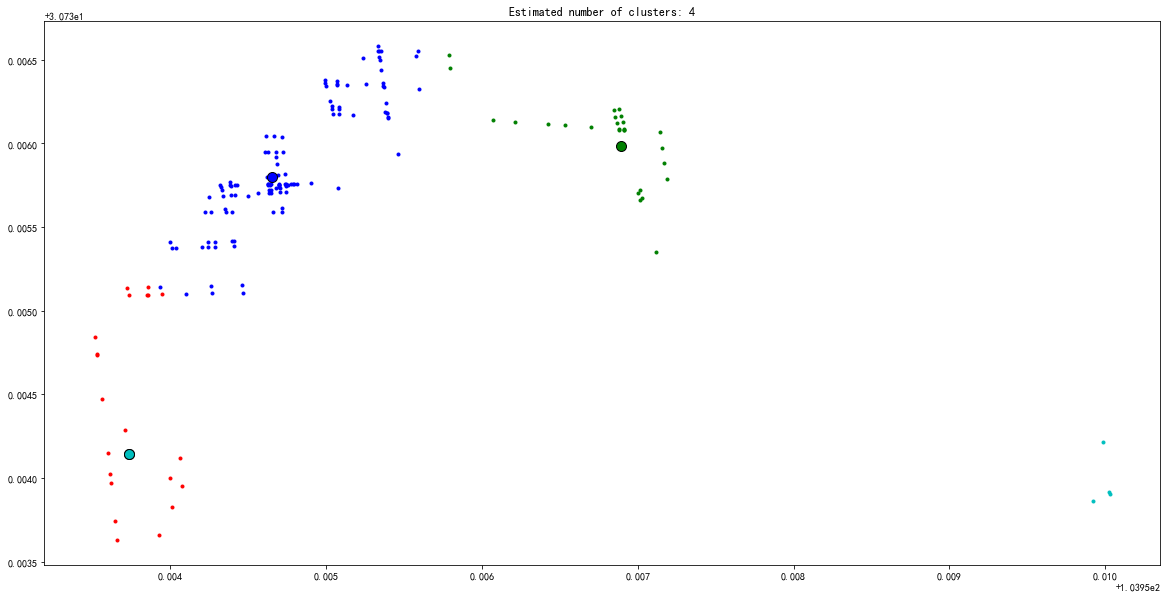

In [7]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth


data = train_set[['lng', 'lat']].values
# print(data)
# data = refined_working_subset
 
# 通过下列代码可自动检测bandwidth值
# 从data中随机选取1000个样本，计算每一对样本的距离，然后选取这些距离的0.2分位数作为返回值，当n_samples很大时，这个函数的计算量是很大的。
# 聚类个数取决于quantile设置的大小。quantile越大，聚类个数越小；quanile越小，聚类个数越大。
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=int(len(data) * 0.7), random_state=0)
# print(bandwidth)
# bin_seeding设置为True就不会把所有的点初始化为核心位置，从而加速算法
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# 训练模型
ms.fit(data)

# 类别标签
labels = ms.labels_
# 类别中心点
cluster_centers = ms.cluster_centers_
# 计算类别个数
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
 
print("number of estimated clusters : %d" % n_clusters)


result_k = []
# 计算其自动生成的k，并将聚类数量小于3的排除
arr_flag = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in ms.labels_:
    arr_flag[i]+=1
k = 0
for i in range(len(arr_flag)):
    if(arr_flag[i] >= 10):
        k +=1
        result_k.append(i)
print(arr_flag)
print("类别中采样点数大于10的有：")
print(k)
print("分别为：")
print(result_k)
final_result = []
for k in range(n_clusters):
    # current_member表示标签为k的记为true 反之false
    current_member = labels == k
    if k in result_k:
        cluster_center = cluster_centers[k]
        final_result.append(list(cluster_center))
        print("中心点为：")
        print(cluster_center)

# 画图
import matplotlib.pyplot as plt
from itertools import cycle
 
plt.figure(1, figsize=(20,10))

plt.clf()  # 清楚上面的旧图形
 
# cycle把一个序列无限重复下去
colors = cycle('bgrcmyk')
for k, color in zip(range(n_clusters), colors):
    # current_member表示标签为k的记为true 反之false
    current_member = labels == k
    if k in result_k:
        cluster_center = cluster_centers[k]

    # 画点
    plt.plot(data[current_member, 0], data[current_member, 1], color + '.')
    #画圈
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=color,  #圈内颜色
             markeredgecolor='k',  #圈边颜色
             markersize=10)  #圈大小
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [8]:
df = pd.DataFrame(final_result)
df.columns = ['lng', 'lat']

In [9]:
df

,lng,lat
0,103.954651,30.735797
1,103.956893,30.735986
2,103.953736,30.734144


In [580]:
k = 0
distance_matrix = []
for i, row in df.iterrows():
#     print(row)
    # 计算聚类中心点之间的距离
#   

    df['distance'] = df[['lng', 'lat']] \
        .apply(lambda x: getDistance(row['lat'], row['lng'], x['lat'], x['lng']), axis=1)
    distance_matrix.append(list(df['distance']))
    k += 1
    # 去掉数据中的为0的值
#     temp_set = df[(True^df['distance'].isin([0]))]
    print(df)
print(distance_matrix)

          lng        lat     distance
0  106.486151  29.444037     0.000000
1  106.480810  29.430750  1567.080751
2  106.489545  29.443149   343.540731
3  106.495250  29.443290   885.926601
          lng        lat     distance
0  106.486151  29.444037  1567.080751
1  106.480810  29.430750     0.000000
2  106.489545  29.443149  1619.262448
3  106.495250  29.443290  1976.922253
          lng        lat     distance
0  106.486151  29.444037   343.540731
1  106.480810  29.430750  1619.262448
2  106.489545  29.443149     0.000000
3  106.495250  29.443290   553.239948
          lng        lat     distance
0  106.486151  29.444037   885.926601
1  106.480810  29.430750  1976.922253
2  106.489545  29.443149   553.239948
3  106.495250  29.443290     0.000000
[[0.0, 1567.0807508986948, 343.54073108662146, 885.9266009332907], [1567.0807508986948, 0.0, 1619.2624484062653, 1976.922252506953], [343.54073108662146, 1619.2624484062653, 0.0, 553.2399479925965], [885.9266009332907, 1976.922252506953, 55

In [80]:
# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平局轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阀值
for n_clusters in range(2, 20):  # 遍历从2到5几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters,init='k-means++', n_init=10, max_iter=500)  # 建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(refined_working_subset)  # 训练聚类模型
    silhouette_tmp = silhouette_score(refined_working_subset, labels_tmp)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  # 如果平均轮廓系数更高
        best_k = n_clusters  # 保存K将最好的K存储下来
        silhouette_int = silhouette_tmp  # 保存平均轮廓得分
        best_kmeans = model_kmeans  # 保存模型实例对象
        cluster_labels_k = labels_tmp  # 保存聚类标签
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print('{:*^60}'.format('K值对应的轮廓系数:'))
print(np.array(score_list))  # 打印输出所有K下的详细得分
print('最优的K值是:{0} \n对应的轮廓系数是:{1}'.format(best_k, silhouette_int))

*************************K值对应的轮廓系数:*************************
[[ 2.          0.65041982]
 [ 3.          0.73753849]
 [ 4.          0.76277725]
 [ 5.          0.78657866]
 [ 6.          0.6218307 ]
 [ 7.          0.62039511]
 [ 8.          0.62149073]
 [ 9.          0.61453191]
 [10.          0.60866756]
 [11.          0.48734624]
 [12.          0.43260766]
 [13.          0.438571  ]
 [14.          0.44658882]
 [15.          0.47229688]
 [16.          0.48951471]
 [17.          0.49421778]
 [18.          0.51035434]
 [19.          0.50260378]]
最优的K值是:5 
对应的轮廓系数是:0.786578656522814


In [45]:
df[['lng','lat']]
train_set = df[['lng','lat']]
''' standardize the points '''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=False)
scaler.fit(train_set)
refined_working_subset = scaler.transform(train_set)
refined_working_subset

array([[-8.01407516e-03, -7.25668894e-03],
       [-8.13607516e-03, -7.40968894e-03],
       [-8.15607516e-03, -7.41168894e-03],
       [-6.79507516e-03, -5.12068894e-03],
       [-1.04507516e-03, -1.02068894e-03],
       [-1.04207516e-03, -1.00468894e-03],
       [-1.02507516e-03, -1.03468894e-03],
       [-1.01607516e-03, -1.04768894e-03],
       [-1.01907516e-03, -1.04368894e-03],
       [-1.04707516e-03, -1.02668894e-03],
       [-1.05007516e-03, -1.04268894e-03],
       [-1.02507516e-03, -1.05068894e-03],
       [-1.02507516e-03, -1.06468894e-03],
       [-1.02507516e-03, -1.06268894e-03],
       [-1.01507516e-03, -1.03768894e-03],
       [-1.01907516e-03, -1.06468894e-03],
       [-1.02007516e-03, -1.07168894e-03],
       [-1.02907516e-03, -1.05668894e-03],
       [-1.03807516e-03, -1.06768894e-03],
       [-1.00807516e-03, -1.06368894e-03],
       [-1.05207516e-03, -1.14368894e-03],
       [-1.01607516e-03, -1.07768894e-03],
       [-1.02507516e-03, -1.09368894e-03],
       [-9.

[4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 7 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


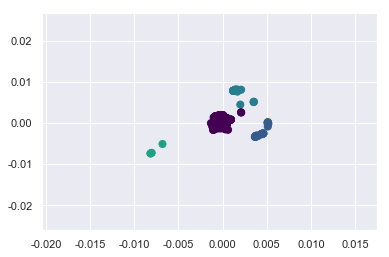

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#产生实验数据
# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=700, centers=4,
#                        cluster_std=0.5, random_state=2019)
X = refined_working_subset #方便画图
# print(X)
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=8).fit(X) #指定聚类中心个数为4
labels = gmm.predict(X)
print(labels)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

In [56]:
from matplotlib.patches import Ellipse

#给定的位置和协方差画一个椭圆
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    #将协方差转换为主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    #画出椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
#画图
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=4, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=4, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_  , gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

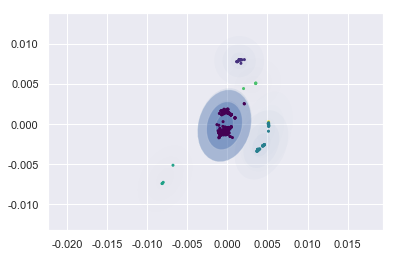

In [60]:
rng = np.random.RandomState(13)
# X_stretched = np.dot(refined_working_subset, rng.randn(2, 2))
gmm = GMM(n_components=10, covariance_type='full', random_state=42)
plot_gmm(gmm, refined_working_subset)

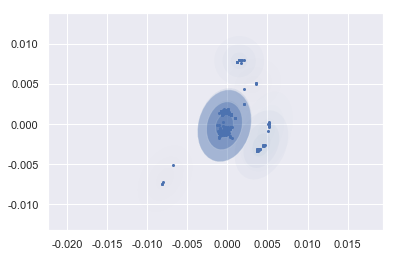

In [61]:
gmm10 = GMM(n_components=10, covariance_type='full', random_state=0)
plot_gmm(gmm10, refined_working_subset, label=False)

Text(0.5, 0, 'n_components')

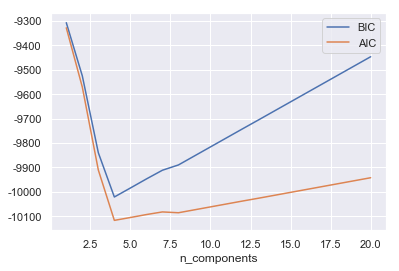

In [63]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(refined_working_subset)
          for n in n_components]

plt.plot(n_components, [m.bic(refined_working_subset) for m in models], label='BIC')
plt.plot(n_components, [m.aic(refined_working_subset) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

#### 均值偏移聚类：


[[0.00000000e+00 2.20907220e-05 5.31507291e-05 ... 3.34228963e-04
  3.35073126e-04 3.42614944e-04]
 [0.00000000e+00 3.64005494e-05 4.97292670e-05 ... 5.50616019e-04
  5.56003597e-04 5.56785416e-04]
 [0.00000000e+00 2.06155281e-05 2.10000000e-05 ... 2.93025596e-04
  2.94205710e-04 2.95746513e-04]
 ...
 [0.00000000e+00 1.00498756e-05 2.90688837e-05 ... 3.45700738e-04
  3.52319457e-04 3.53022662e-04]
 [0.00000000e+00 1.64368488e-04 1.69168555e-04 ... 1.52072154e-03
  1.52879201e-03 1.58350403e-03]
 [0.00000000e+00 2.12132034e-05 6.10081962e-05 ... 3.60022222e-04
  3.60455268e-04 3.65141069e-04]]
[0 1 2 3]


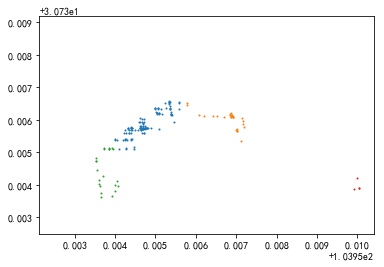

[[103.9547442   30.73586581]
 [103.95686004  30.73599232]
 [103.95373607  30.73414427]
 [103.95999125  30.733976  ]]


In [10]:
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster.tests.common import generate_clustered_data

min_samples = 10
eps = 0.0309

X = train_set[['lng', 'lat']].values

#quantile 控制是否同一类别的距离
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=len(X))
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)  # 构建对象
meanshift.fit(X)
labels = meanshift.labels_
cluster_centers = meanshift.cluster_centers_

print(np.unique(labels))

fig, ax = plt.subplots()
cluster_num = len(np.unique(labels))  # label的个数，即自动划分的族群的个数
for i in range(0, cluster_num):
    x = []
    y = []
    for ind, label in enumerate(labels):
        if label == i:
            x.append(X[ind][0])
            y.append(X[ind][1])
#         print(x)
#         print(y)
#     plt.figure(figsize=(10,30))
    plt.scatter(x, y, s=1)

plt.show()
print(cluster_centers)

In [11]:
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors

import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster.tests.common import generate_clustered_data

min_samples = 10
eps = 0.0309

X = df[['lng', 'lat']].values

#quantile 控制是否同一类别的距离
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=len(X))
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)  # 构建对象
meanshift.fit(X)
labels = meanshift.labels_

print(np.unique(labels))

fig, ax = plt.subplots()
cluster_num = len(np.unique(labels))  # label的个数，即自动划分的族群的个数
for i in range(0, cluster_num):
    x = []
    y = []
    for ind, label in enumerate(labels):
        if label == i:
            x.append(X[ind][0])
            y.append(X[ind][1])
#         print(x)
#         print(y)
#     plt.figure(figsize=(10,30))
    plt.scatter(x, y, s=1)

plt.show()

[[0.]
 [0.]
 [0.]]


ValueError: bandwidth needs to be greater than zero or None,            got 0.000000

In [88]:
print(cluster_centers)

[[106.65634046  29.50195673]
 [106.65647189  29.50442556]
 [106.66080311  29.49975189]
 [106.65851467  29.51072267]
 [106.661967    29.502915  ]
 [106.658903    29.5073    ]
 [106.650094    29.497734  ]
 [106.648875    29.495598  ]]


In [36]:
print(X)

            lng        lat
0    106.648875  29.495598
1    106.648753  29.495445
2    106.648733  29.495443
3    106.650094  29.497734
4    106.655844  29.501834
..          ...        ...
474  106.656536  29.501923
475  106.656527  29.501937
476  106.655779  29.501930
477  106.656021  29.501451
478  106.655872  29.501213

[479 rows x 2 columns]


In [22]:
print(refined_working_subset)

[[-7.70597908e-03 -7.10327197e-03]
 [-6.48697908e-03 -4.96727197e-03]
 [-7.41979079e-04 -8.89271967e-04]
 [-7.43979079e-04 -9.90271967e-04]
 [-7.07979079e-04 -9.24271967e-04]
 [-7.16979079e-04 -9.40271967e-04]
 [-7.15979079e-04 -9.11271967e-04]
 [-6.58979079e-04 -1.00327197e-03]
 [-6.69979079e-04 -1.03127197e-03]
 [-6.75979079e-04 -9.75271967e-04]
 [-6.91979079e-04 -9.89271967e-04]
 [-6.70979079e-04 -9.83271967e-04]
 [-6.49979079e-04 -9.76271967e-04]
 [-6.66979079e-04 -9.90271967e-04]
 [-6.82979079e-04 -1.00527197e-03]
 [-5.27979079e-04 -9.68271967e-04]
 [-5.29979079e-04 -9.58271967e-04]
 [-4.67979079e-04 -1.22227197e-03]
 [-5.23979079e-04 -9.57271967e-04]
 [-5.69979079e-04 -1.07827197e-03]
 [-5.85979079e-04 -1.12027197e-03]
 [-6.02979079e-04 -1.16427197e-03]
 [-6.66979079e-04 -1.33127197e-03]
 [-7.28979079e-04 -1.49027197e-03]
 [-7.18979079e-04 -1.46627197e-03]
 [-7.52979079e-04 -1.55227197e-03]
 [-6.73979079e-04 -9.79271967e-04]
 [-6.94979079e-04 -9.82271967e-04]
 [ 1.18020921e-04 -1

In [60]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.vq import vq,kmeans2,whiten
import matplotlib.pyplot as plt

"""
使用密度聚类。
"""
def rad(x):
    """
    角度转弧度。
    """
    return x * math.pi / 180.0
EARTH_REDIUS = 6378.137

def haversine(lonlat1, lonlat2):
    """
    通过经纬度计算两点之间的距离。
    作为密度聚类的距离度量函数。
    以米为单位。
    """
    lat1, lon1 = lonlat1
    lat2, lon2 = lonlat2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r * 1000

def getDistance(lonlat1, lonlat2):
    lat1, lng1 = lonlat1
    lat2, lng2 = lonlat2
    
    radLat1 = rad(lat1)
    radLat2 = rad(lat2)
    a = radLat1 - radLat2
    b = rad(lng1) - rad(lng2)
    s = 2 * math.asin(math.sqrt(math.pow(math.sin(a/2), 2) + math.cos(radLat1) * math.cos(radLat2) * math.pow(math.sin(b/2), 2)))
    s = s * EARTH_REDIUS
    return s * 1000

def clustering_by_dbscan_and_kmeans2(df):
    """
    使用DBSCAN密度聚类后，再使用kmeans获取中心点。
    """
    #待聚类的数据
    X = train_set[["lng", "lat"]]

    #距离度量使用球面距离来计算不同经纬度之间的距离
    distance_matrix = squareform(pdist(X, (lambda u, v: getDistance(u, v))))

    #设置DBSCAN聚类参数eps（单位为米）和min_samples
    #n_jobs用于指定需要运行的并行任务数
    db = DBSCAN(eps=30, min_samples=5, metric='precomputed', n_jobs = -1)
    #使用自定义距离度量来执行聚类并返回聚类标签为y_db
    y_db = db.fit_predict(distance_matrix)

    X['cluster'] = y_db

    #对聚类结果和聚类标签进行解析
    #为kmeans做准备
    results = {}
    for i in X.values:
        if i[2] not in results.keys():
            results[i[2]] = [[i[1], i[0]]]
        else:
            if results[i[2]]:
                results[i[2]].append([i[1], i[0]])
            else:
                results[i[2]] = [[i[1], i[0]]]
    print("DBSCAN output: ", len(results), results.keys())

    # 可视化聚类结果
    fig, ax = plt.subplots()
#     cluster_num = len(np.unique(labels))  # label的个数，即自动划分的族群的个数
    for k in results.keys():
        if k != -1:
            
            xy = np.array(results[k])
    #     for i in range(0, cluster_num):
            x = xy[:, 0]
            y = xy[:, 1]
#         for ind, label in enumerate(labels):
#             if label == i:
#                 x.append(X[ind][0])
#                 y.append(X[ind][1])
    #         print(x)
    #         print(y)
            ax.scatter(y, x, s=1)

    plt.show()
#     print("KMeans calc center as below: ")
#     print(results)
    #使用kmeans++对每一个聚类结果进行聚类获取中心点
#     result = []
#     for k in results.keys():
#         if k != -1:
#             xy = np.array(results[k])
#             z = np.sin(xy[:, 1] - 0.2 * xy[:, 1])

#             z = whiten(z)
#             # temp = np.array(zip(xy[:, 0], xy[:, 1], z))
#             # print(list(zip(xy[:, 0], xy[:, 1], z)))
#             res, idx = kmeans2(list(zip(xy[:, 0], xy[:, 1], z)), 1, iter=20, minit='points')
#             result.append(res.tolist()[0])
#             # res = pd.DataFrame(res)
#             # print(res.tolist()[0])
#             X['cluster'] = y_db
#     result = pd.DataFrame(result, columns=['lat','lng'])
    # print(result)
#     return result


DBSCAN output:  1 dict_keys([0.0])


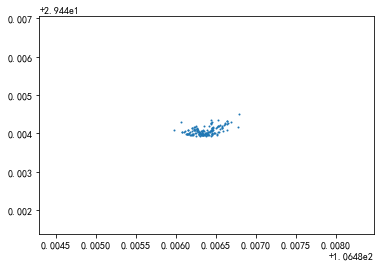

In [61]:
clustering_by_dbscan_and_kmeans2(df)

In [110]:
print(cluster_centers)

[[106.65635259  29.50197101]
 [106.65647012  29.50440813]
 [106.6608726   29.4998051 ]
 [106.65851467  29.51072267]
 [106.661967    29.502915  ]
 [106.658903    29.5073    ]
 [106.650094    29.497734  ]
 [106.648875    29.495598  ]]


In [93]:
estimate_bandwidth?


Signature:
estimate_bandwidth(
    X,
    quantile=0.3,
    n_samples=None,
    random_state=0,
    n_jobs=None,
)
Docstring:
Estimate the bandwidth to use with the mean-shift algorithm.

That this function takes time at least quadratic in n_samples. For large
datasets, it's wise to set that parameter to a small value.

Parameters
----------
X : array-like, shape=[n_samples, n_features]
    Input points.

quantile : float, default 0.3
    should be between [0, 1]
    0.5 means that the median of all pairwise distances is used.

n_samples : int, optional
    The number of samples to use. If not given, all samples are used.

random_state : int, RandomState instance or None (default)
    The generator used to randomly select the samples from input points
    for bandwidth estimation. Use an int to make the randomness
    deterministic.
    See :term:`Glossary <random_state>`.

n_jobs : int or None, optional (default=None)
    The number of parallel jobs to run for neighbors search.
    ``

In [94]:
MeanShift?

Init signature:
MeanShift(
    bandwidth=None,
    seeds=None,
    bin_seeding=False,
    min_bin_freq=1,
    cluster_all=True,
    n_jobs=None,
)
Docstring:     
Mean shift clustering using a flat kernel.

Mean shift clustering aims to discover "blobs" in a smooth density of
samples. It is a centroid-based algorithm, which works by updating
candidates for centroids to be the mean of the points within a given
region. These candidates are then filtered in a post-processing stage to
eliminate near-duplicates to form the final set of centroids.

Seeding is performed using a binning technique for scalability.

Read more in the :ref:`User Guide <mean_shift>`.

Parameters
----------
bandwidth : float, optional
    Bandwidth used in the RBF kernel.

    If not given, the bandwidth is estimated using
    sklearn.cluster.estimate_bandwidth; see the documentation for that
    function for hints on scalability (see also the Notes, below).

seeds : array, shape=[n_samples, n_features], optional
  